<a href="https://colab.research.google.com/github/vitovicenti/Computer-Vision-Exercises/blob/main/Vito_Vicenti_exercises_7_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [332]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Read an image and detect corners using:

* the Harris corner detector - implemented in OpenCV via the method cv2.CornerHarris()

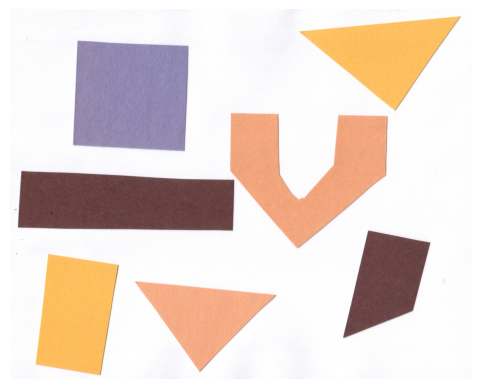

In [333]:
img = cv2.imread('shapes-01.jpeg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

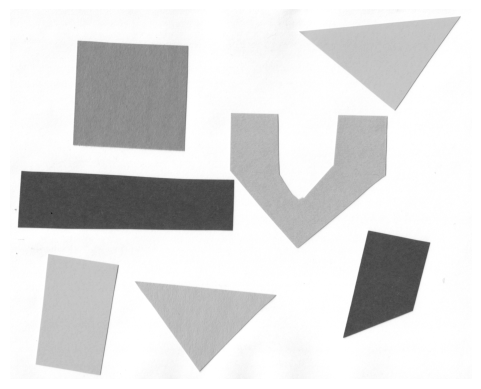

In [334]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray,cmap='gray')
plt.axis('off')
plt.show()

Rmax = 4.5739274e-05


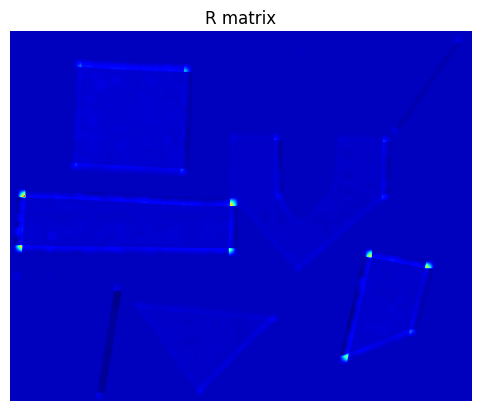

In [335]:
R = cv2.cornerHarris(img_gray, blockSize = 55, ksize = 3, k = 0.04)

print('Rmax =', R.max())

plt.imshow(R, cmap='jet')
plt.axis('off')
plt.title('R matrix')
plt.show()

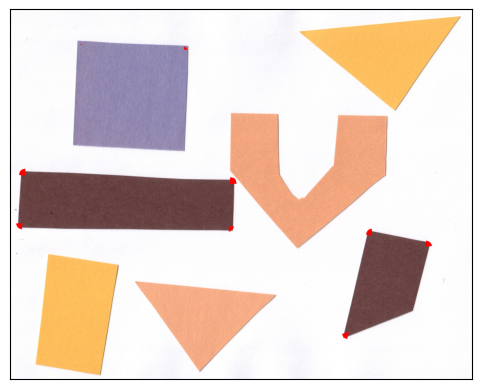

In [336]:
img_copy = img.copy()
img_copy[R > 0.2 * R.max()] = [255,0,0]
plt.imshow(img_copy)
plt.show(plt.xticks([]), plt.yticks([]))
plt.show()

* the Shi-Tomasi corner detector - implemented in OpenCV via the method cv2.goodFeaturesToTrack() 

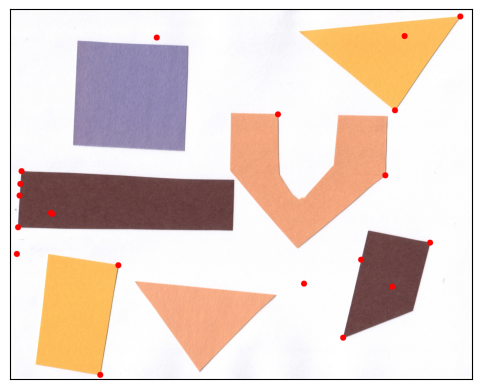

In [337]:
corners_detected = cv2.goodFeaturesToTrack(img_gray, 20, 0.01, 10)
corners_detected = np.int0(corners_detected)

img_copy2 = img.copy()

for i in corners_detected:
    x, y = i.ravel()
    cv2.circle(img_copy2, (x,y), 20, (255,0,0), -1)

plt.imshow(img_copy2)
plt.show(plt.xticks([]), plt.yticks([]))

* Compare the results

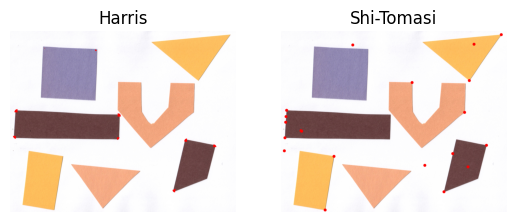

In [338]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.axis('off')
ax1.set_title('Harris')
ax1.imshow(img_copy)

ax2.axis('off')
ax2.set_title('Shi-Tomasi')
ax2.imshow(img_copy2)

# **HOG descriptor**

* Take two images containing similar objects (e.g. both containing a face)

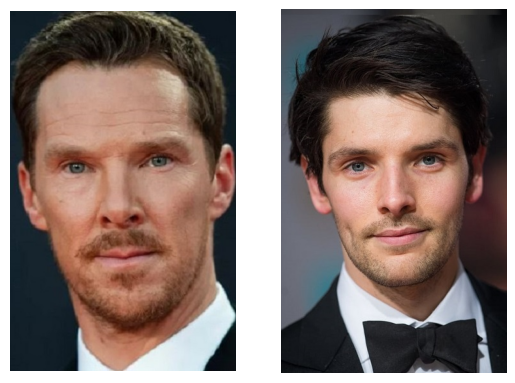

In [420]:
img1 = cv2.imread('img1.JPG')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('img2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

#print images
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.axis('off')
ax1.imshow(img1)

ax2.axis('off')
ax2.imshow(img2)

* Convert in gray-level and resize the images so that they have the same size. Both height and width should be multiple of 8 (e.g. 128x128 or 256x64)

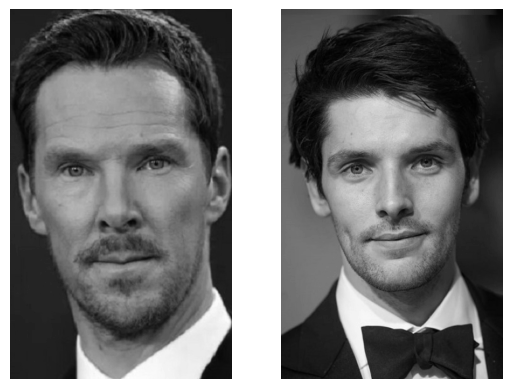

In [421]:
# convert images to gray-level
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#resize images to a multiple of 8
img1_res = cv2.resize(img1_gray, (384, 640), interpolation = cv2.INTER_AREA)
img2_res = cv2.resize(img2_gray, (384, 640), interpolation = cv2.INTER_AREA)

#print images
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.axis('off')
ax1.imshow(img1_res, cmap='gray')

ax2.axis('off')
ax2.imshow(img2_res, cmap='gray')

* Compute the HOG features for both images

In [442]:
from sklearn.metrics.pairwise import cosine_similarity

hog = cv2.HOGDescriptor()
hog_img1 = hog.compute(img1_res)
hog_img2 = hog.compute(img2_res)

hog_img1_reshaped = hog_img1.reshape(1, -1)
hog_img2_reshaped = hog_img2.reshape(1, -1)

* Evaluate the similarity among the two HOG descriptors using the Cosine similarity

In [441]:
cos_sim = cosine_similarity(hog_img1_reshaped, hog_img2_reshaped)

print("The cosine similarity between the two images is:\n", cos_sim)

The cosine similarity between the two images is:
 [[0.66772413]]


# **Haar face detector**

* Load an image containing faces


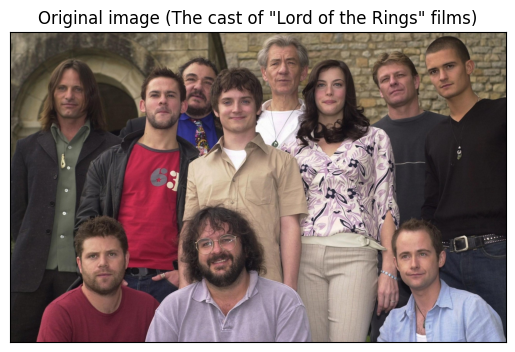

In [426]:
img_faces = cv2.imread('img_faces.jpg')
img_faces = cv2.cvtColor(img_faces, cv2.COLOR_BGR2RGB)

plt.imshow(img_faces)
plt.title('Original image (The cast of "Lord of the Rings" films)')
plt.show(plt.xticks([]), plt.yticks([]))

* Apply the Haar face detector to the image using OpenCV library

In [427]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [428]:
def detect_faces(img, scale_factor, min_neighbors):

  gray_faces = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

  #find face on the roi
  faces = face_cascade.detectMultiScale(gray_faces, scaleFactor=scale_factor, minNeighbors=min_neighbors)
  faces_copy = img.copy()

  for(x, y, w, h) in faces:
          cv2.rectangle(faces_copy, (x, y), (x+w, y+h), (255, 255, 0), 3)
  return faces_copy


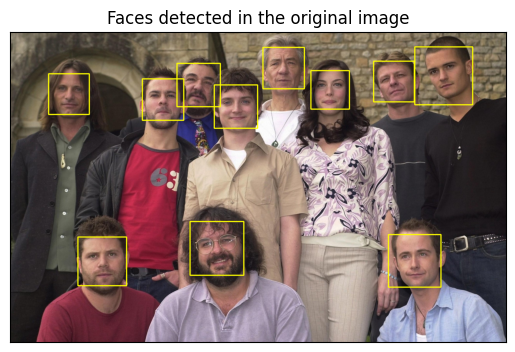

In [429]:
detected_faces = detect_faces(img_faces, 1.3, 5)

imgplot = plt.imshow(detected_faces)
plt.title("Faces detected in the original image")
plt.show(plt.xticks([]), plt.yticks([]))

* Write code that rotates, flips, or distorts the image to simulate different face orientations and lighting conditions

In [430]:
def increase_brightness(img, value):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)
    return img

In [431]:
rotated_img = cv2.rotate(img_faces, cv2.ROTATE_90_CLOCKWISE)

flipped_img = cv2.flip(img_faces, 1)

bright_img = increase_brightness(img_faces, 50)

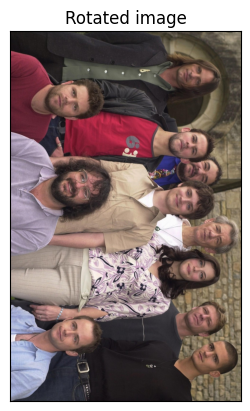

In [432]:
plt.imshow(rotated_img, cmap = 'gray')
plt.title('Rotated image')
plt.show(plt.xticks([]), plt.yticks([]))
plt.show()

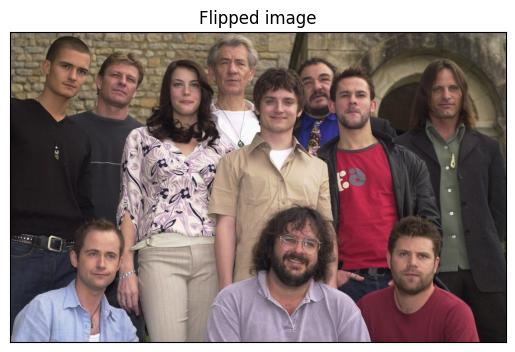

In [433]:
plt.imshow(flipped_img, cmap = 'gray')
plt.title('Flipped image')
plt.show(plt.xticks([]), plt.yticks([]))
plt.show()

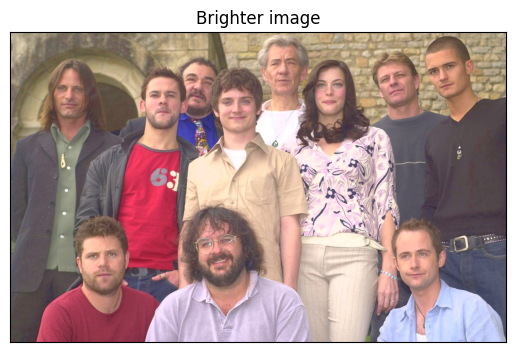

In [434]:
plt.imshow(bright_img, cmap = 'gray')
plt.title('Brighter image')
plt.show(plt.xticks([]), plt.yticks([]))
plt.show()

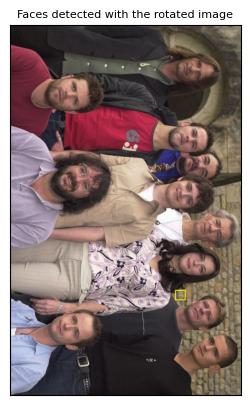

In [435]:
rotated_faces_detected = detect_faces(rotated_img, 1.3, 5)

imgplot1 = plt.imshow(rotated_faces_detected)
plt.title("Faces detected with the rotated image", fontsize=8)
plt.show(plt.xticks([]), plt.yticks([]))
plt.show()

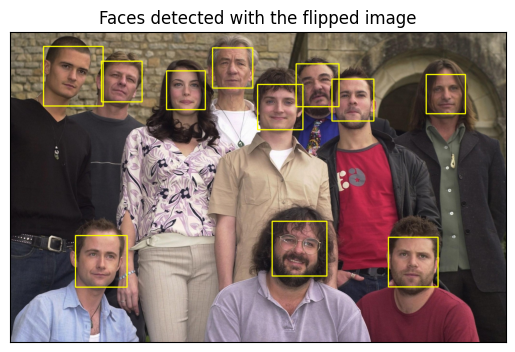

In [436]:
flipped_faces_detected = detect_faces(flipped_img, 1.3, 5)

imgplot = plt.imshow(flipped_faces_detected)
plt.title("Faces detected with the flipped image", fontsize=12)
plt.show(plt.xticks([]), plt.yticks([]))
plt.show()

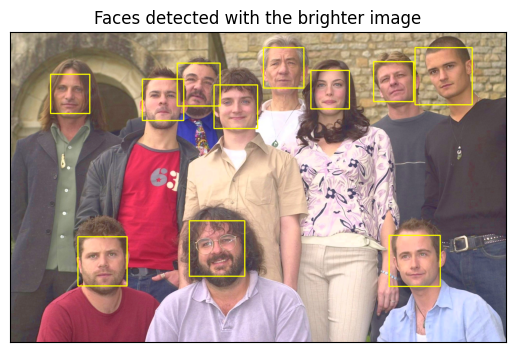

In [437]:
bright_faces_detected = detect_faces(bright_img, 1.3, 5)

imgplot = plt.imshow(bright_faces_detected)
plt.title("Faces detected with the brighter image", fontsize=12)
plt.show(plt.xticks([]), plt.yticks([]))
plt.show()

* Analyze and comment the result

# **Conclusions**

* The Haar cascade classifier worked well with the original image. All the faces in the image have been detected.

* In the rotated image It's not able to detect relevant features from the faces. It only wrongly detected a part of the wall behind the people in the image as a face.

* In the flipped image It worked very well, detecting all the faces in the image.

* When It had to deal the brighter image, Haar cascade classifier detected all faces, except for the central person down the middle.